In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.spatial.transform import Rotation as R

In [3]:
pelvis = pd.read_csv('David-60-pokus02/Xsens_DOT_2_D422CD006474_20250409_105845.csv', skiprows= 7,  sep=',')
right = pd.read_csv('David-60-pokus02/Xsens_DOT_4_D422CD006380_20250409_105845.csv', skiprows= 7,  sep=',')
left = pd.read_csv('David-60-pokus02/Xsens_DOT_3_D422CD006379_20250409_105845.csv', skiprows= 7,  sep=',')

In [4]:
# I zero the clock at the first row, this makes all subsequent rows relative to test start
right['real_ticks'] = right['SampleTimeFine'] - right['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
right['time_s'] = right['real_ticks'] * 1e-6

# Convert seconds to milliseconds
right['time_ms'] = right['time_s'] * 1000
#  show the actual intervals between samples
right['delta_ms'] = right['time_ms'].diff()

# I zero the clock at the first row, this makes all subsequent rows relative to test start
left['real_ticks'] = left['SampleTimeFine'] - left['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
left['time_s'] = left['real_ticks'] * 1e-6

# Convert seconds to milliseconds
left['time_ms'] = left['time_s'] * 1000
#  show the actual intervals between samples
left['delta_ms'] = left['time_ms'].diff()


# I zero the clock at the first row, this makes all subsequent rows relative to test start
pelvis['real_ticks'] = pelvis['SampleTimeFine'] - pelvis['SampleTimeFine'].iloc[0] 

# Converting the ticks to seconds and milliseconds
pelvis['time_s'] = pelvis['real_ticks'] * 1e-6

# Convert seconds to milliseconds
pelvis['time_ms'] = pelvis['time_s'] * 1000
#  show the actual intervals between samples
pelvis['delta_ms'] = pelvis['time_ms'].diff()

In [5]:
right[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,756.000000,756.000000
mean,0.331913,6291.792500
std,7.183931,3639.784321
min,-105.726212,0.000000
25%,0.584975,3145.896250
50%,0.746635,6291.792500
75%,0.991369,9437.688750
max,64.128662,12583.585000


In [6]:
left[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,756.000000,756.000000
mean,-1.018905,6291.792500
std,7.682951,3639.784321
min,-96.038765,0.000000
25%,-0.975497,3145.896250
50%,-0.768804,6291.792500
75%,-0.104530,9437.688750
max,94.824844,12583.585000


In [7]:
pelvis[['Acc_Z', 'time_ms']].describe()

,Acc_Z,time_ms
count,756.000000,756.000000
mean,1.007195,6291.792500
std,2.915564,3639.784321
min,-22.539587,0.000000
25%,0.440389,3145.896250
50%,0.603550,6291.792500
75%,0.832070,9437.688750
max,27.861889,12583.585000


<Axes: title={'center': 'Pelvis Acc Z vs Time'}, xlabel='time_ms'>

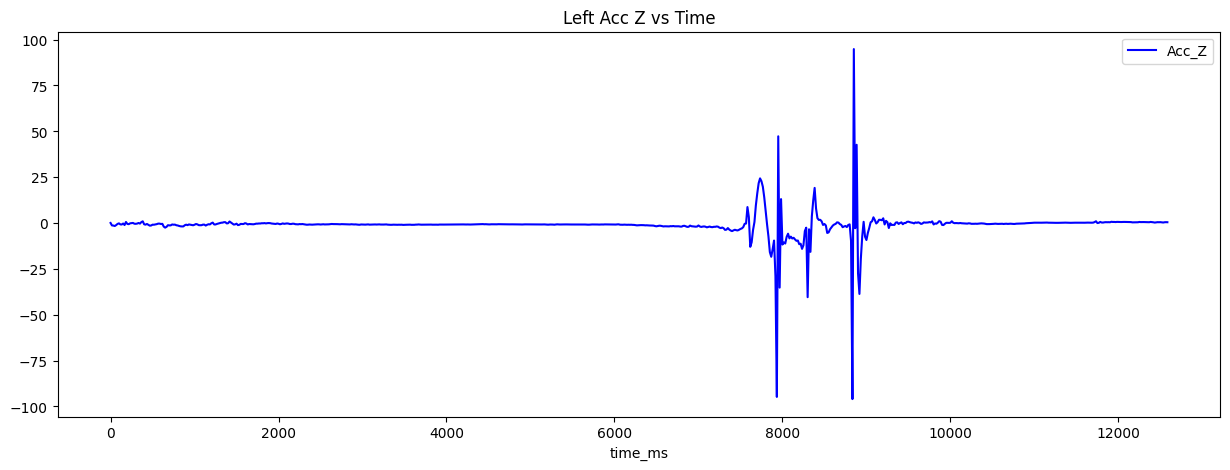

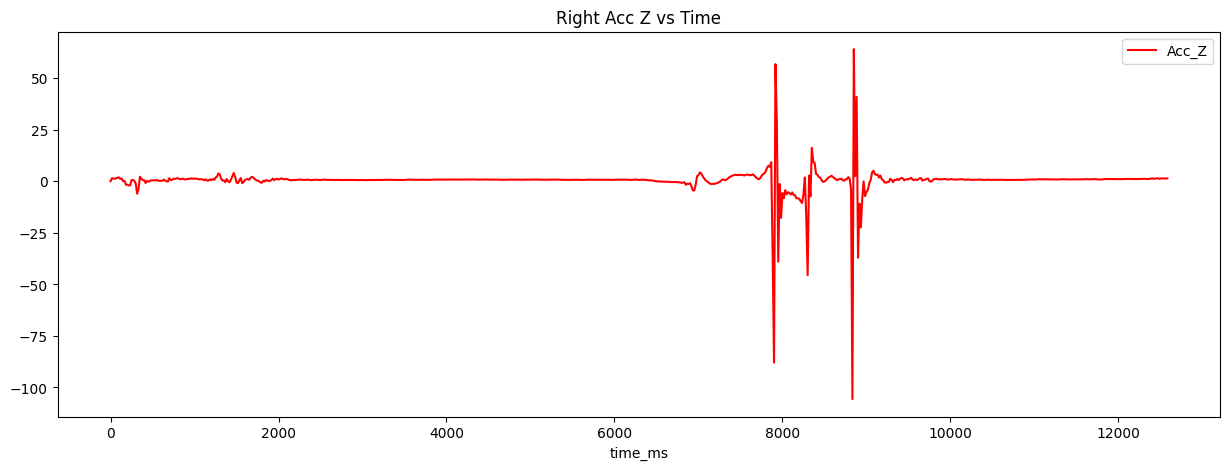

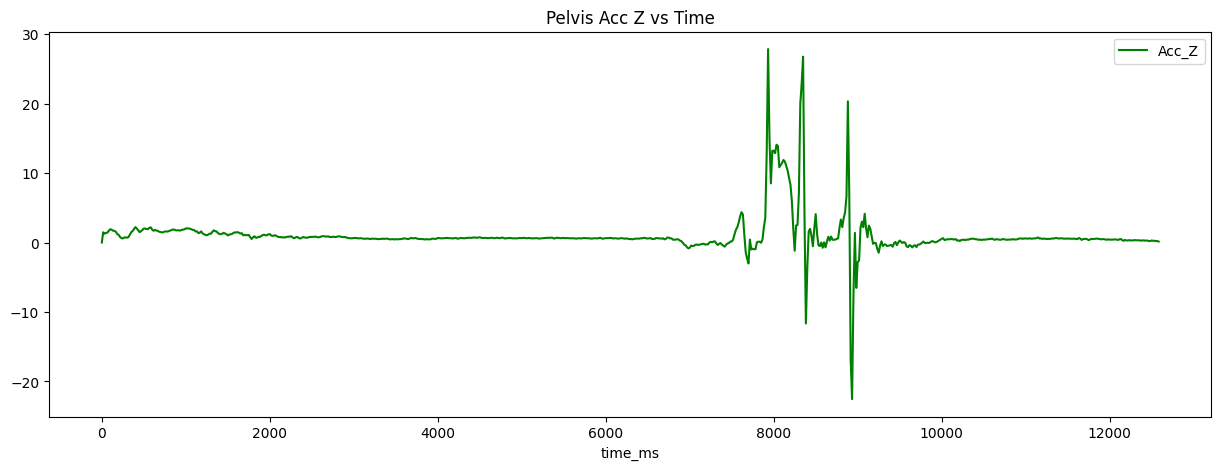

In [8]:
# visualize the data and find the connection between the accelerometer  and ties 
left.plot(x='time_ms', y='Acc_Z', title='Left Acc Z vs Time', figsize=(15, 5), color='blue')
right.plot(x='time_ms', y='Acc_Z', title='Right Acc Z vs Time', figsize=(15, 5), color='red')
pelvis.plot(x='time_ms', y='Acc_Z', title='Pelvis Acc Z vs Time', figsize=(15, 5), color='green')
